In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [2]:
# loading the dataset
datatest = pd.read_csv(r'C:\Users\ckatkaa\Desktop\HVAC Occupancy Detection with ML and DL Methods\Refrence\Occupancy-detection-data-master\datatest.txt')
datatest2 = pd.read_csv(r'C:\Users\ckatkaa\Desktop\HVAC Occupancy Detection with ML and DL Methods\Refrence\Occupancy-detection-data-master\datatest2.txt')
datatraining = pd.read_csv(r'C:\Users\ckatkaa\Desktop\HVAC Occupancy Detection with ML and DL Methods\Refrence\Occupancy-detection-data-master\datatraining.txt')

In [3]:
# save the data set in csv
datatest.to_csv(r'C:\Users\ckatkaa\Desktop\HVAC Occupancy Detection with ML and DL Methods\Refrence\Occupancy-detection-data-master\datatest.csv')
datatest2.to_csv(r'C:\Users\ckatkaa\Desktop\HVAC Occupancy Detection with ML and DL Methods\Refrence\Occupancy-detection-data-master\datatest2.csv')
datatraining.to_csv(r'C:\Users\ckatkaa\Desktop\HVAC Occupancy Detection with ML and DL Methods\Refrence\Occupancy-detection-data-master\datatraining.csv')

In [4]:
datatest.head(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
(datatest.shape),(datatest2.shape),(datatraining.shape)


((2665, 7), (9752, 7), (8143, 7))

In [6]:
datatest2.head(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [7]:
datatraining.head(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


# Data Types and Missing Values

datatest

In [8]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
date             2665 non-null object
Temperature      2665 non-null float64
Humidity         2665 non-null float64
Light            2665 non-null float64
CO2              2665 non-null float64
HumidityRatio    2665 non-null float64
Occupancy        2665 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [9]:
# finding the null values and its percentage and then concat both

total=datatest.isnull().sum().sort_values(ascending=False)
percentage = (total*100/datatest.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percentage],axis=1,keys=['total_missing_values_per_row','percentage'])
print(missing_data)

               total_missing_values_per_row  percentage
CO2                                       0         0.0
Humidity                                  0         0.0
HumidityRatio                             0         0.0
Light                                     0         0.0
Occupancy                                 0         0.0
Temperature                               0         0.0
date                                      0         0.0


C:\Users\ckatkaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [10]:
datatest.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


datatest2

In [11]:
datatest2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
date             9752 non-null object
Temperature      9752 non-null float64
Humidity         9752 non-null float64
Light            9752 non-null float64
CO2              9752 non-null float64
HumidityRatio    9752 non-null float64
Occupancy        9752 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [12]:
total=datatest2.isnull().sum().sort_values(ascending=False)
percentage = (total*100/datatest2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percentage],axis=1,keys=['total_missing_values_per_row','percentage'])
print(missing_data)

               total_missing_values_per_row  percentage
CO2                                       0         0.0
Humidity                                  0         0.0
HumidityRatio                             0         0.0
Light                                     0         0.0
Occupancy                                 0         0.0
Temperature                               0         0.0
date                                      0         0.0


C:\Users\ckatkaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
datatest2.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


datatraining

In [14]:
datatraining.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [15]:
total=datatraining.isnull().sum().sort_values(ascending=False)
percentage = (total*100/datatraining.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percentage],axis=1,keys=['total_missing_values_per_row','percentage'])
print(missing_data)

               total_missing_values_per_row  percentage
CO2                                       0         0.0
Humidity                                  0         0.0
HumidityRatio                             0         0.0
Light                                     0         0.0
Occupancy                                 0         0.0
Temperature                               0         0.0
date                                      0         0.0


C:\Users\ckatkaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
datatraining.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [17]:
# Mergine the data set on the base of Date

datatest_datatesttrain = pd.concat([datatest,datatraining])
data = pd.concat([datatest_datatesttrain,datatest2])

In [18]:
(datatest_datatesttrain.shape),(data.shape)


((10808, 7), (20560, 7))

In [19]:
#data.to_csv(r'C:\Users\ckatkaa\Desktop\HVAC Occupancy Detection with ML and DL Methods\data.csv')

# Exploratory Data Analysis

In [20]:
#normalizer = MinMaxScaler()
#columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
#normalizer.fit(data[columns])
#data[columns] = normalizer.transform(data[columns])

In [21]:
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


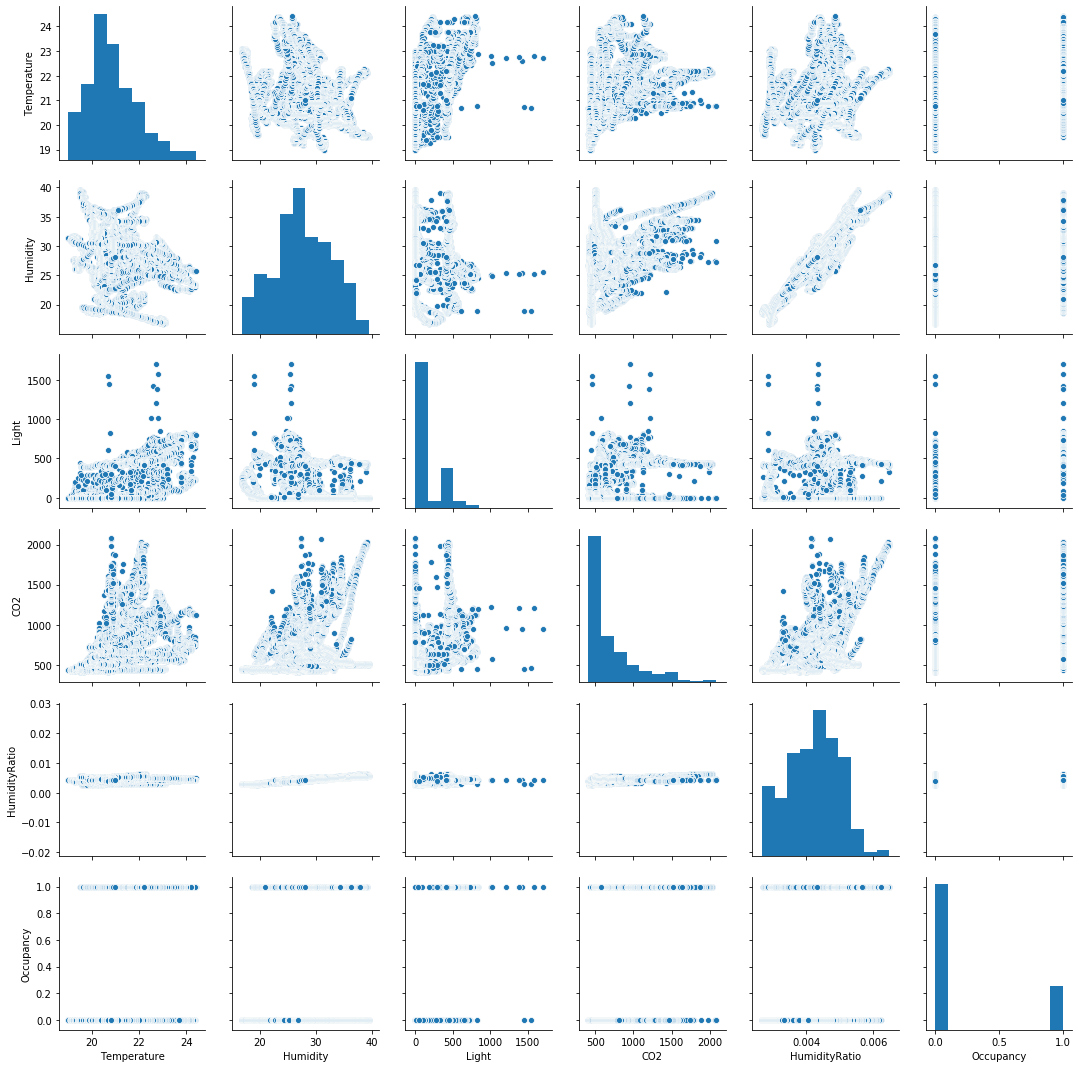

In [22]:
sns.pairplot(data)

Text(0.5, 1.0, 'Distribution Of Occupancy')

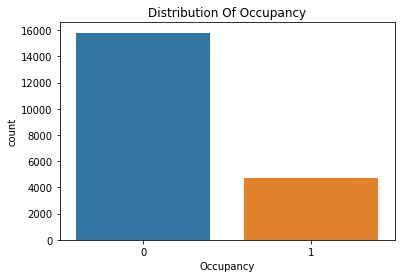

In [23]:
# hist plot for occupancy
sns.countplot(x="Occupancy", data=data)
plt.title('Distribution Of Occupancy')


Text(0.5, 1.0, 'Distribution Of Occupancy')

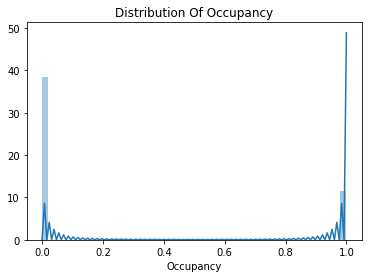

In [24]:
sns.distplot(data["Occupancy"])
plt.title('Distribution Of Occupancy')

        Temperature      Humidity         Light           CO2  HumidityRatio
count  20560.000000  20560.000000  20560.000000  20560.000000   20560.000000
mean      20.906212     27.655925    130.756622    690.553276       0.004228
std        1.055315      4.982154    210.430875    311.201281       0.000768
min       19.000000     16.745000      0.000000    412.750000       0.002674
25%       20.200000     24.500000      0.000000    460.000000       0.003719
50%       20.700000     27.290000      0.000000    565.416667       0.004292
75%       21.525000     31.290000    301.000000    804.666667       0.004832
max       24.408333     39.500000   1697.250000   2076.500000       0.006476


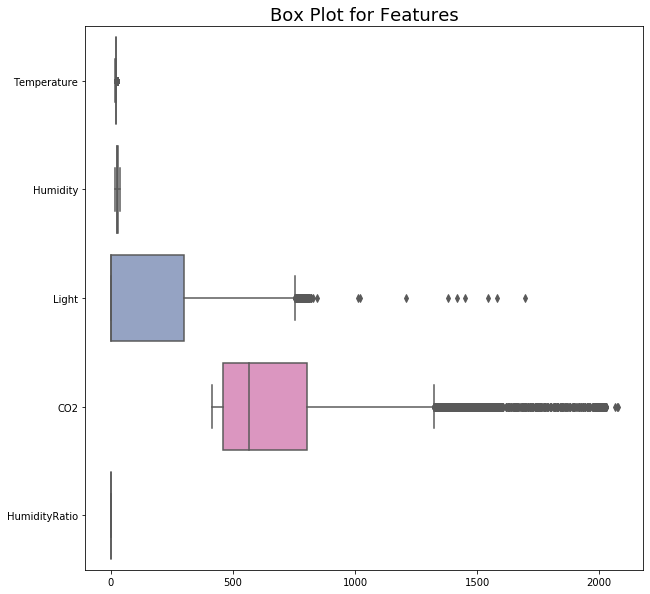

In [25]:
# Box Plot for te features
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=data.drop(['date', 'Occupancy'],axis=1), orient="h", palette="Set2")
print(data.drop(['date', 'Occupancy'],axis=1).describe())

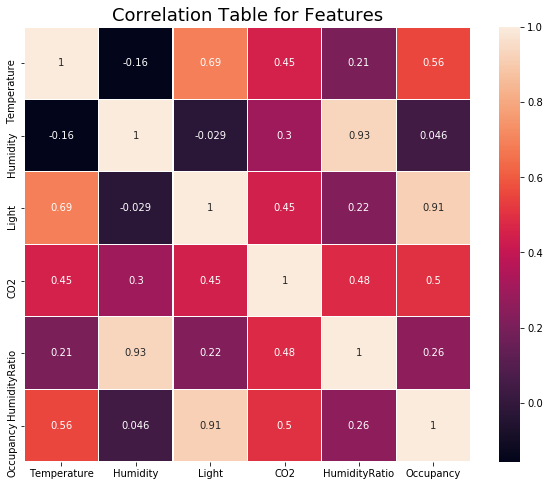

In [26]:
plt.figure(figsize=(10,8))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(data.corr(), annot=True, linewidths=.2)

In [27]:
correlations_data = data.corr()['Occupancy'].sort_values()
print(correlations_data)

Humidity         0.046240
HumidityRatio    0.257324
CO2              0.501582
Temperature      0.555610
Light            0.914850
Occupancy        1.000000
Name: Occupancy, dtype: float64


In [28]:
# distribute the sunrise column into month and year
data['date']=pd.to_datetime(data['date'],format='%Y-%m-%d  %H:%M:%S')

data['date_year']=data['date'].dt.year
data['date_month']=data['date'].dt.month
data['date_day']=data['date'].dt.day
data['date_hour']=data['date'].dt.hour
data['date_minute']=data['date'].dt.minute
data['date_second']=data['date'].dt.second

Text(0.5, 1.0, 'Occupancy as per day with respect to temperature')

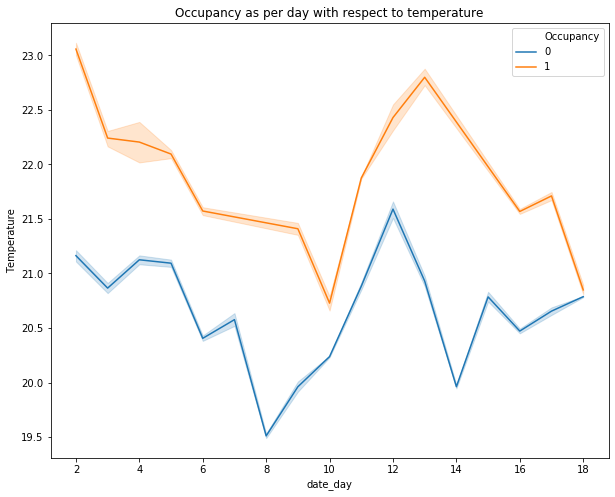

In [29]:
# Occupancy as per day with respect to temperature
plt.figure(figsize=(10,8))
sns.lineplot(x="date_day", y="Temperature", hue="Occupancy",data=data)
plt.title('Occupancy as per day with respect to temperature')

Text(0.5, 1.0, 'Occupancy as per day with respect to CO2')

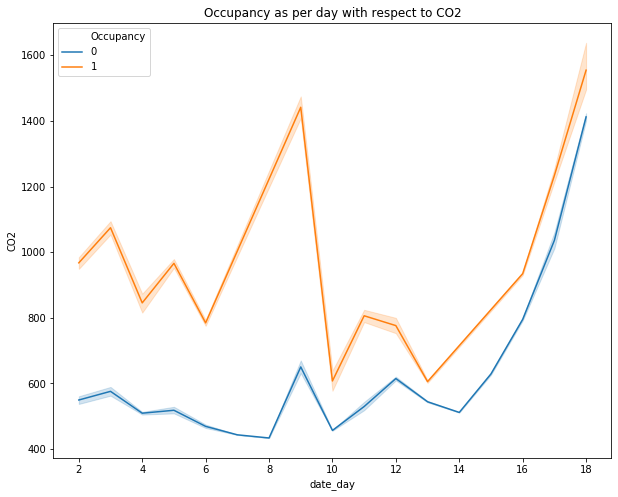

In [30]:
# Occupancy as per day with respect to CO2
plt.figure(figsize=(10,8))
sns.lineplot(x="date_day", y="CO2", hue="Occupancy",data=data)
plt.title('Occupancy as per day with respect to CO2')

Text(0.5, 1.0, 'Occupancy as per day with respect to CO2')

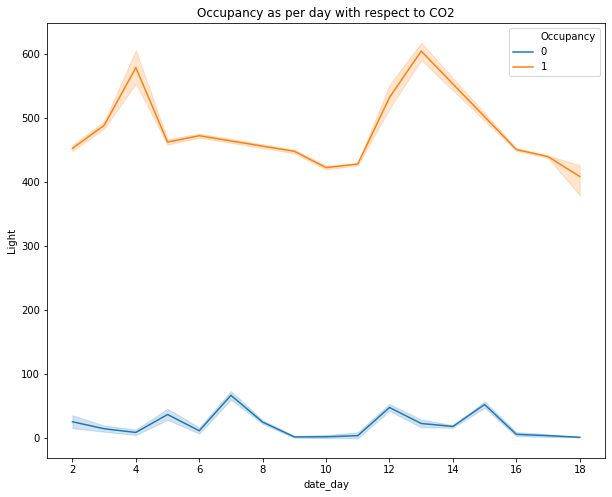

In [31]:
# Occupancy as per day with respect to CO2
plt.figure(figsize=(10,8))
sns.lineplot(x="date_day", y="Light", hue="Occupancy",data=data)
plt.title('Occupancy as per day with respect to CO2')

Text(0.5, 1.0, 'Occupancy as per hrs ')

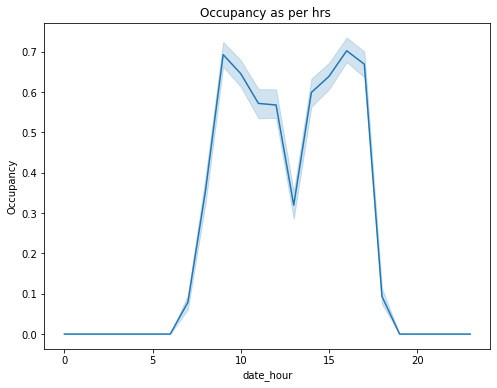

In [32]:
# Occupancy as per day with respect to temperature
plt.figure(figsize=(8,6))
sns.lineplot(x="date_hour", y="Occupancy",data=data)
plt.title('Occupancy as per hrs ')

# Base Model

In [33]:
normalizer = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
normalizer.fit(data[columns])
data[columns] = normalizer.transform(data[columns])

In [34]:
#Splitting the data 
X = data.drop(['Occupancy','date'],1)
y = data['Occupancy']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [35]:
# Instatiate models

rf = RandomForestClassifier()
knn = KNeighborsClassifier()
xgb = XGBClassifier()
# Fit and predict

print('Random Forest Results')
print('---------------------')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print('')

print('K Nearest Neighbors')
print('---------------------')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print('')

print('XGB Classifier')
print('---------------------')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print('')

Random Forest Results
---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4754
           1       0.99      0.99      0.99      1414

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168

[[4733   21]
 [  17 1397]]
0.9917800181965428

K Nearest Neighbors
---------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4754
           1       0.88      0.85      0.87      1414

    accuracy                           0.94      6168
   macro avg       0.92      0.91      0.91      6168
weighted avg       0.94      0.94      0.94      6168

[[4596  158]
 [ 212 1202]]
0.9084177754875072

XGB Classifier
---------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4754
           1       0